In [17]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('../styles_and_utils/graphstyle.mplstyle')

import sys
sys.path.insert(1, '../')
from styles_and_utils import *

In [18]:
# pandas
import pandas as pd
def df2np(df, model):
    df = df.loc[df['Model'] == model, 'SSIM']
    return df.to_numpy().T

# Load Knee results
knee_df = pd.read_excel('Knee_results.xlsx')

knee_unt_008M = df2np(knee_df, 'U-Net-8M')
knee_unt_031M = df2np(knee_df, 'U-Net-31M')
knee_unt_124M = df2np(knee_df, 'U-Net-124M')

knee_vit_008M = df2np(knee_df, 'ViT-8M/10')
knee_vit_032M = df2np(knee_df, 'ViT-32M/10')
knee_vit_060M = df2np(knee_df, 'ViT-60M/10')



# Load Brain results
brain_df = pd.read_excel('Brain_results.xlsx')

brain_unt_031M = df2np(brain_df, 'U-Net-31M')
brain_unt_124M = df2np(brain_df, 'U-Net-124M')

brain_vit_032M = df2np(brain_df, 'ViT-32M/10')
brain_vit_060M = df2np(brain_df, 'ViT-60M/10')

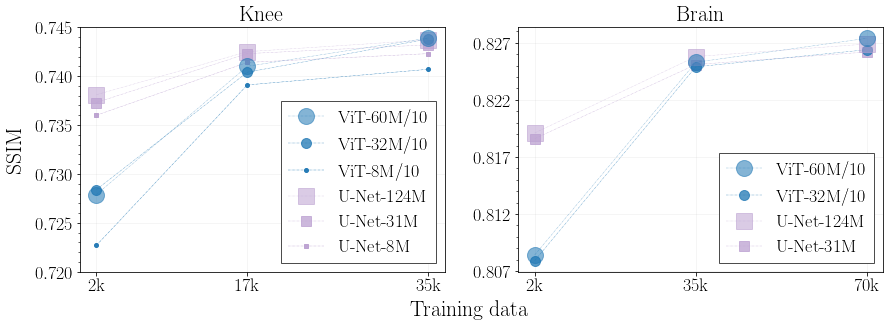

In [20]:
w, h = plt.rcParams["figure.figsize"]
fig, axes = plt.subplots(1, 2, figsize=(2*w, h))

""" Model styles """
vits = ViT('s')
vitm = ViT('m')
vitl = ViT('l')

unts = Unet('s')
untm = Unet('m')
untl = Unet('l')

""" Plot Knee """
ax = axes[0]
knee_train_data = [2, 17, 35]
ax.plot(knee_train_data, knee_vit_060M, vitl.marker, markersize=vitl.ms, alpha=vitl.oc, color=vitl.color, label=vitl.label, zorder=6)
ax.plot(knee_train_data, knee_vit_032M, vitm.marker, markersize=vitm.ms, alpha=vitm.oc, color=vitm.color, label=vitm.label, zorder=4)
ax.plot(knee_train_data, knee_vit_008M, vits.marker, markersize=vits.ms, alpha=vits.oc, color=vits.color, label=vits.label, zorder=2)
ax.plot(knee_train_data, knee_unt_124M, untl.marker, markersize=untl.ms, alpha=untl.oc, color=untl.color, label=untl.label, zorder=5)
ax.plot(knee_train_data, knee_unt_031M, untm.marker, markersize=untm.ms, alpha=untm.oc, color=untm.color, label=untm.label, zorder=3)
ax.plot(knee_train_data, knee_unt_008M, unts.marker, markersize=unts.ms, alpha=unts.oc, color=unts.color, label=unts.label, zorder=1)

ax.set_title('Knee')
ax.set_xticks(knee_train_data)
ax.set_xticklabels(['2k', '17k', '35k'])
ax.tick_params(axis='x', which='minor', bottom=False)
ax.yaxis.set_ticks(np.arange(0.72, 0.745, 0.005))
ax.legend()

""" Plot Brain """
ax = axes[1]
brain_train_data = [2, 35, 70]
ax.plot(brain_train_data, brain_vit_060M, vitl.marker, markersize=vitl.ms, alpha=vitl.oc, color=vitl.color, label=vitl.label, zorder=4)
ax.plot(brain_train_data, brain_vit_032M, vitm.marker, markersize=vitm.ms, alpha=vitm.oc, color=vitm.color, label=vitm.label, zorder=2)
ax.plot(brain_train_data, brain_unt_124M, untl.marker, markersize=untl.ms, alpha=untl.oc, color=untl.color, label=untl.label, zorder=3)
ax.plot(brain_train_data, brain_unt_031M, untm.marker, markersize=untm.ms, alpha=untm.oc, color=untm.color, label=untm.label, zorder=1)

ax.set_title('Brain')
ax.set_xticks(brain_train_data)
ax.set_xticklabels(['2k', '35k', '70k'])
ax.tick_params(axis='x', which='minor', bottom=False)
ax.yaxis.set_ticks(np.arange(0.807, 0.828, 0.005))
ax.legend()

# Labels
fig.supxlabel('Training data', y=-0.02)
fig.supylabel('SSIM', x=0.055)

## Save
fig.savefig('sc4x_performance.pdf', format="pdf", bbox_inches = 'tight')